In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import lasio

from tslearn.metrics import dtw,dtw_path,dtw_path_from_metric
from scipy.signal import medfilt

In [4]:
las1 = lasio.read(r'C:\Users\mno\Desktop\mno\Nilo\tcc\LAS\1_ALV_5_BA_1.las')
las2 = lasio.read(r'C:\Users\mno\Desktop\mno\Nilo\tcc\LAS\1_ALV_6D_BA.las')
las3 = lasio.read(r'C:\Users\mno\Desktop\mno\Nilo\tcc\LAS\3_MGP_19_BA.las')
las4 = lasio.read(r'C:\Users\mno\Desktop\mno\Nilo\tcc\LAS\3_MGP_35D_BA.las')
df = las1.df()
df2 = las2.df()
df3 = las3.df()
df4 = las4.df()

In [5]:
df['PERFIL'] = '1_ALV_5_BA'
df2['PERFIL'] = '1_ALV_6D_BA'
df3['PERFIL'] = '3_MGP_19_BA'
df4['PERFIL'] = '3_MGP_35D_BA'

In [6]:
wells = ['1_ALV_5_BA', '1_ALV_6D_BA','3_MGP_19_BA','3_MGP_35D_BA']
#data = df[df.PERFIL.isin(wells)]
#data.head()

In [7]:
df = df.reset_index()
df2 = df2.reset_index()
df3 = df3.reset_index()
df4 = df4.reset_index()

In [8]:
data = df[df.PERFIL.isin(wells)]
data2 = df2[df2.PERFIL.isin(wells)]

In [9]:
data = data[data.GR>0]
data2 = data2[data2.GR>0]

In [23]:
t1 = data[data.PERFIL=='1_ALV_5_BA'][['DEPTH','GR']]
t2 = data2[data2.PERFIL=='1_ALV_6D_BA'][['DEPTH','GR']]

In [11]:
n_med=151
t1['GR'] = medfilt(t1['GR'],kernel_size=n_med)
t2['GR'] = medfilt(t2['GR'],kernel_size=n_med)

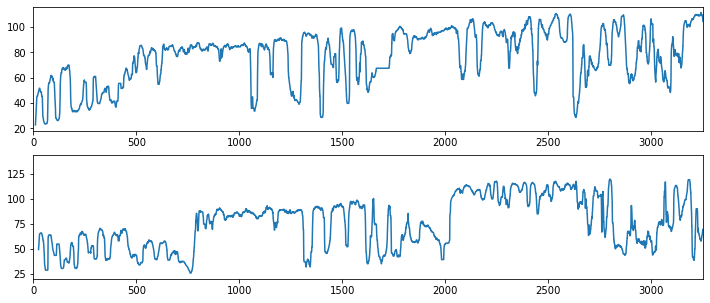

In [12]:
fig,axes = plt.subplots(nrows=2,figsize=(12,5))
axes[0].plot(t1['DEPTH'],t1['GR'])
axes[1].plot(t2['DEPTH'],t2['GR'])

for ax in axes:
    ax.set_xlim(0,3250)

In [13]:
t1 = t1[t1.DEPTH<=3250]
t2 = t2[t2.DEPTH<=3250]

In [14]:
path,cost = dtw_path(t1.GR.values/t1.GR.std(),t2.GR.values/t2.GR.std())

In [15]:
cost

67.96695357791316

In [16]:
t1.reset_index(drop=True,inplace=True)
t2.reset_index(drop=True,inplace=True)

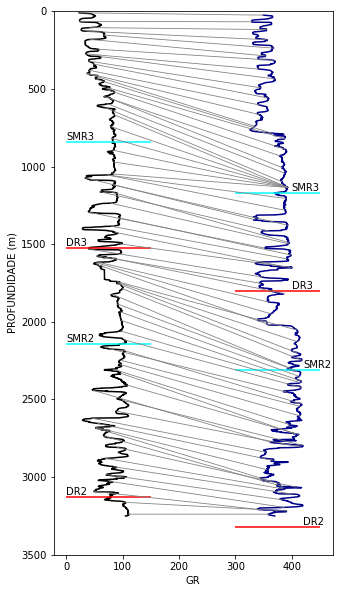

In [19]:
fig,axes = plt.subplots(nrows=1,figsize=(5,10))
axes.plot(t1['GR'],t1['DEPTH'], color ='black')
axes.plot(t2['GR']+300,t2['DEPTH'], color ='darkblue')
axes.set_ylim(0,3500)
axes.invert_yaxis()



plt.xlabel("GR")
plt.ylabel("PROFUNDIDADE (m)")

for i in np.arange(0,len(path),500):
    axes.plot([t1.GR.iloc[path[i][0]],t2.GR.iloc[path[i][1]]+300],[t1.DEPTH.iloc[path[i][0]],t2.DEPTH.iloc[path[i][1]]],c='grey', lw=0.8)
    
    